The storage and transfer of large neural networks is also a challenge in mobile device environments, because of limitations on application sizes and long application download times.
We wish to compress the network as much as possible, to reduce the amount of bandwidth and compute required. Inducing sparseness, through regularization or pruning, in neural-network models, is one way to compress the network (quantization is another method). Sparse neural networks hold the promise of speed, small size, and energy efficiency.


### Smaller 
The models need to be faster and smaller. 

Sparse NN model representations can be compressed by taking advantage of the fact that the tensor elements are dominated by zeros. The compression format, if any, is very HW and SW specific, and the optimal format may be different per tensor (an obvious example: largely dense tensors should not be compressed). The compute hardware needs to support the compressions formats, for representation compression to be meaningful. Compression representation decisions might interact with algorithms such as the use of tiles for memory accesses. Data such as a parameter tensor is read/written from/to main system memory compressed, but the computation can be dense or sparse. In dense compute we use dense operators, so the compressed data eventually needs to be decompressed into its full, dense size. The best we can do is bring the compressed representation as close as possible to the compute engine.

Sparse compute, on the other hand, operates on the sparse representation which never requires decompression (we therefore distinguish between sparse representation and compressed representation). This is not a simple matter to implement in HW, and often means lower utilization of the vectorized compute engines. Therefore, there is a third class of representations, which take advantage of specific hardware characteristics. For example, for a vectorized compute engine we can remove an entire zero-weights vector and skip its computation (this uses structured pruning or regularization).



### Faster 
Many of the layers in modern neural-networks are bandwidth-bound, which means that the execution latency is dominated by the available bandwidth. In essence, the hardware spends more time bringing data close to the compute engines, than actually performing the computations. Fully-connected layers, RNNs and LSTMs are some examples of bandwidth-dominated operations.

Reducing the bandwidth required by these layers, will immediately speed them up.

Some pruning algorithms prune entire kernels, filters and even layers from the network without adversely impacting the final accuracy. Depending on the hardware implementation, these methods can be leveraged to skip computations, thus reducing latency and power.



### More energy efficient

Because we pay two orders-of-magnitude more energy to access off-chip memory (e.g. DDR) compared to on-chip memory (e.g. SRAM or cache), many hardware designs employ a multi-layered cache hierarchy. Fitting the parameters and activations of a network in these on-chip caches can make a big difference on the required bandwidth, the total inference latency, and off course reduce power consumption.
And of course, if we used a sparse or compressed representation, then we are reducing the data throughput and therefore the energy consumption.



Model diagram for the compression workflow, and how to integrate the Jupyter notebooks as part of our research.

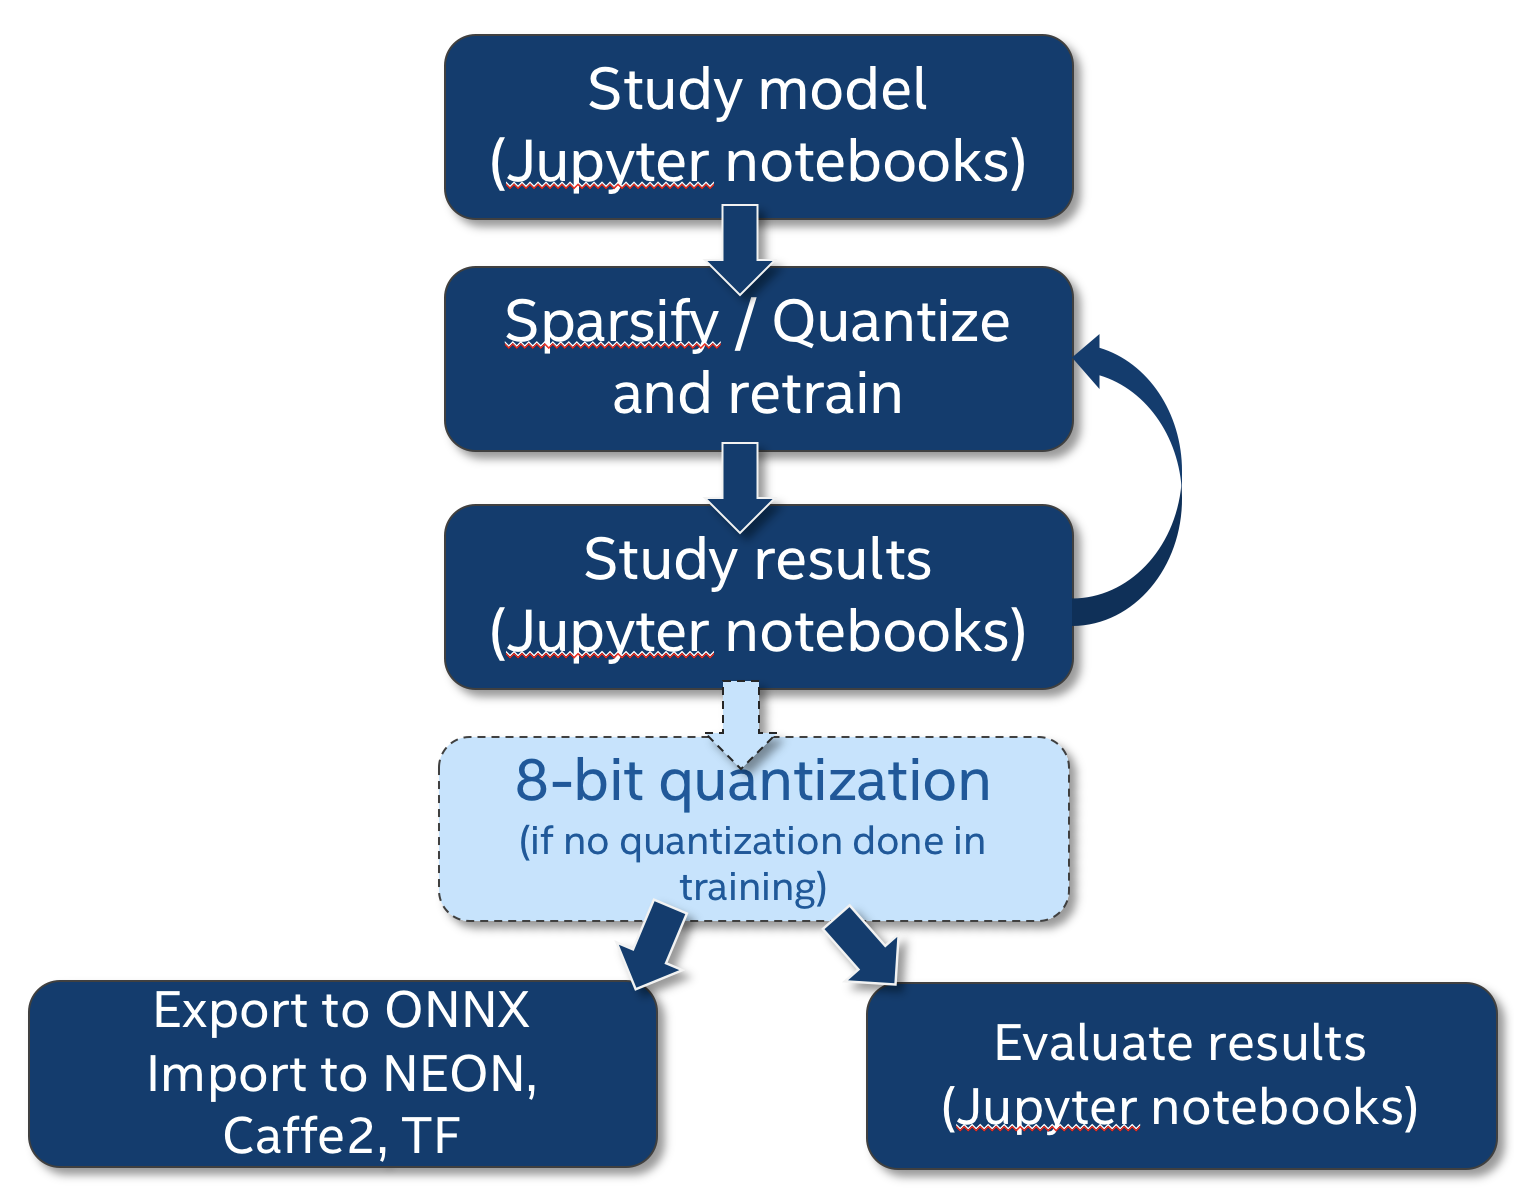




As suggested, we need to start with the Post-Training Quantization,

## Post-Training Quantization
Post-training quantization differs from the other techniques described here. Since it is not executed during training, it does not require any Policies nor a Scheduler. Currently, the only method implemented for post-training quantization is [range-based linear quantization](https://intellabs.github.io/distiller/algo_quantization.html#range-based-linear-quantization). Quantizing a model using this method, requires adding 2 lines of code:

```python
quantizer = distiller.quantization.PostTrainLinearQuantizer(model, <quantizer arguments>)
quantizer.prepare_model()
# Execute evaluation on model as usual
```



In [ ]:
Sources:
1. https://intellabs.github.io/distiller/index.html
2. 